12/14/18
Data generated by Wenchao

## Import Library

In [3]:
# Project specific libraries
library(limma)
library(edgeR)
library(DESeq2)
library(reshape2)
library(ggplot2)

In [4]:
# Import Lib for exixting scripts
library(devtools)
library(roxygen2)

#### Working directory

In [5]:
# DFCI
setwd ("Z:/Ajit/wenchao data")

## Import data

In [6]:
data <- read.table("RawData.txt", header=T, sep="\t")
pdata <- read.table("pdata.txt", header=T, sep="\t")

### Pre-processing

In [7]:
# Remove transcripts that are not expressed
data <- data[rowSums(data[2:ncol(data)])!=0, ]
dim (data)

[1] 20654    19

In [8]:
# Merge multiple transcripts into one gene
# Import function
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/collapse_to_one_gene.R")
# Merge
data_merged <- genesummary (data)
dim(data_merged)
head(data_merged)

SHA-1 hash of file is 747de43c7a29ee194eff2a030c8433b6ad7afdba


[1] 20503    18

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
7SK,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
A1BG-AS1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
A2M,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A4GALT,2,2,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0
AAAS,23,15,8,9,8,0,11,12,2,12,14,17,8,2,9,13,14,23
AACS,12,12,11,6,6,0,10,21,4,4,5,3,3,1,16,9,1,6


In [9]:
# Normalise data using limma-voom
# Create design matrix
#design <- model.matrix(~ pdata$Resistance)
# Apply voom transformation
#nf <- calcNormFactors(data_merged)
#v <- voom(data_merged, design, lib.size=colSums(data_merged)*nf, normalize.method="quantile", plot=TRUE)

# Normalise data using DE-Seq
dds <- DESeqDataSetFromMatrix(countData = data_merged, colData = pdata, design = ~ 1)
dds <- DESeq(dds)
plotDispEsts(dds)

# EdgeR normalisation
#dge <- DGEList(counts=data_merged, group=pdata$Resistance)
# Normalize by total count
#dge <- calcNormFactors(dge)
# Create the contrast matrix
#design.mat <- model.matrix(~ 0 + dge$samples$group)
#colnames(design.mat) <- levels(dge$samples$group)
# Estimate dispersion parameter for GLM
#dge <- estimateGLMCommonDisp(dge, design.mat)
#dge <- estimateGLMTrendedDisp(dge, design.mat, method="power")
#dge<- estimateGLMTagwiseDisp(dge,design.mat)
#plotBCV(dge)

ERROR: Error in DESeqDataSet(se, design = design, ignoreRank): some values in assay are not integers


In [128]:
# Filtering to remove lowly expressed genes
myCPM <- v$E
# Which values in myCPM are greater than 0.5?
thresh <- myCPM > 0.5
# we would like to keep genes that have at least 2 TRUES in each row of thresh
keep <- rowSums(thresh) >= 2
# Subset the rows of countdata to keep the more highly expressed genes
dge.keep <- dge[keep,]
summary(keep)
dim(dge.keep)

   Mode    TRUE 
logical   20503 

[1] 20503    18

In [129]:
n_data <- data.frame(dge.keep$counts)
dim(n_data)

[1] 20503    18

In [154]:
head(data_merged)

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
7SK,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
A1BG-AS1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
A2M,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A4GALT,2,2,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0
AAAS,23,15,8,9,8,0,11,12,2,12,14,17,8,2,9,13,14,23
AACS,12,12,11,6,6,0,10,21,4,4,5,3,3,1,16,9,1,6


No id variables; using all as measure variables
Warning message:
"Removed 158952 rows containing non-finite values (stat_boxplot)."

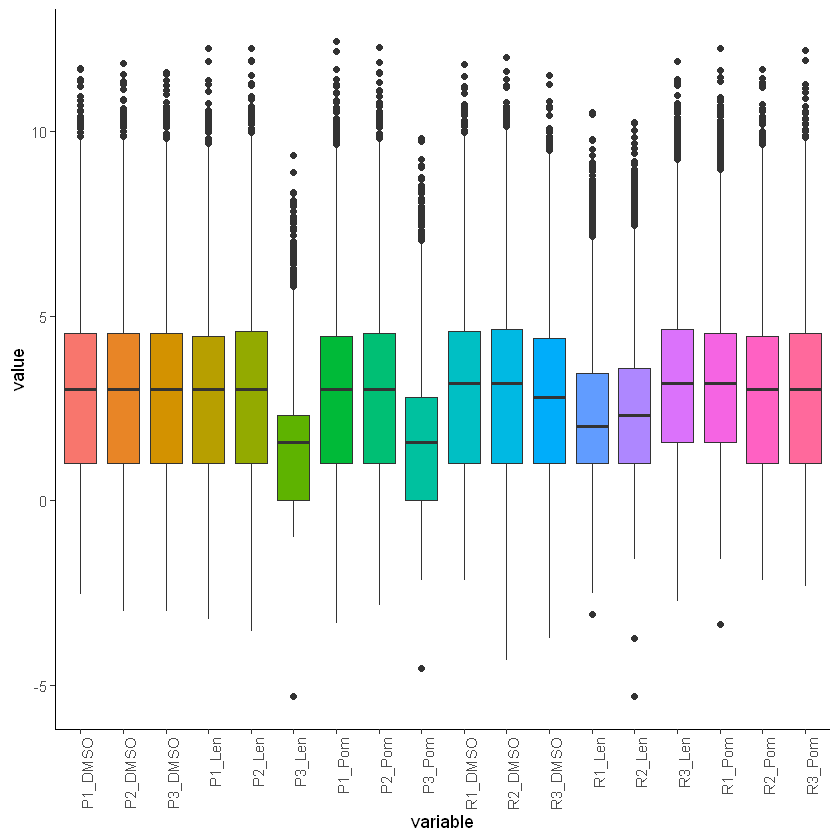

In [130]:
# Vizulaize expression profile before and after normalization
ggplot(data = melt(log2(n_data)), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
  theme_classic()+
  theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))


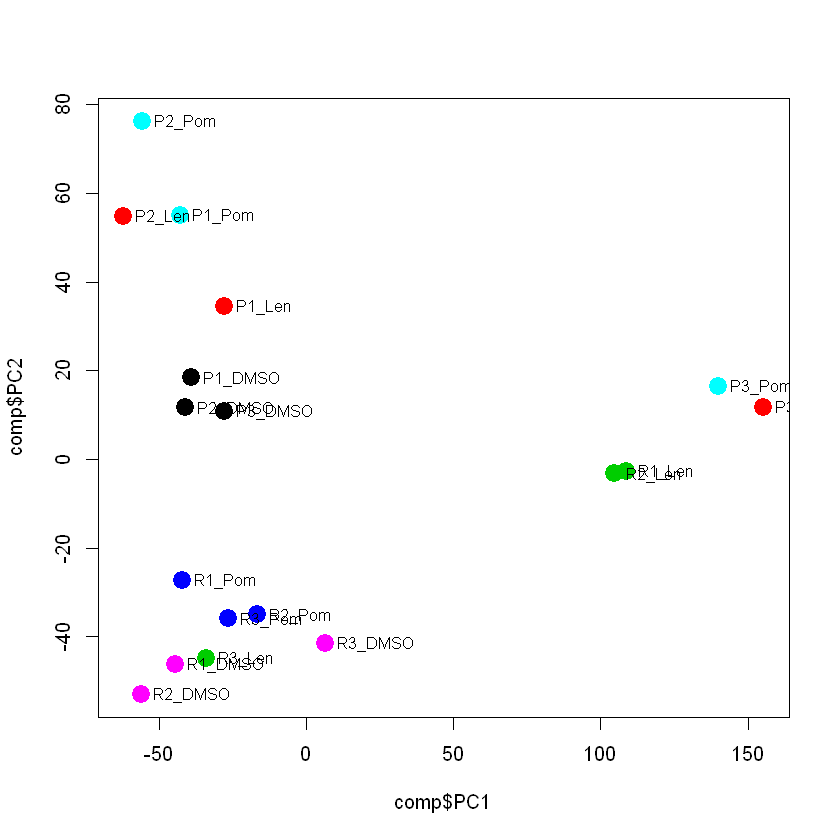

In [126]:
# PCA
y.pca <- prcomp(t(n_data), center = TRUE,scale. = TRUE)
comp <- data.frame(y.pca$x[,1:18])
comp$col = c("#7fc97f", "#7fc97f","#7fc97f",
             "#beaed4", "#beaed4","#beaed4",
             "fdc086", "fdc086","fdc086",
             "ffff99","ffff99","ffff99",
             "386cb0","386cb0","386cb0",
             "f0027f","f0027f","f0027f")
comp$col = as.factor(comp$col)
#plot3d(comp$PC1, comp$PC2, col = comp$col, cex = 12)
plot(comp$PC1, comp$PC2, col = comp$col, pch=19, cex = 2)
text(comp$PC1, comp$PC2, labels=row.names(comp), cex= 0.8, pos=4)